## What is No Free-Lunch Theorem?

In a famous 1996 paper, David Wolpert demonstrated that if you make absolutely no assumption about the data, then there is no reason to prefer one model over any other. This is called the **No Free Lunch (NFL) theorem**. 
- For some datasets the best model is a linear model, while for other datasets it is a neural network. There is no model that is a priori guaranteed to work better (hence the name of the theorem). The only way to know for sure which model is best is to evaluate them all. 
- Since this is not possible, in practice you make some reasonable assumptions about the data and evaluate only a few reasonable models. For example, for simple tasks you may evaluate linear models with various levels of regularization, and for a complex problem you may evaluate various neural networks.

## What is the notion of the 'Unusually Effectiveness of Data'?

In a famous paper published in 2001, Microsoft researchers Michele Banko and Eric Brill showed that very different Machine Learning algorithms, including fairly simple ones, performed almost identically well on a complex problem of natural language disambiguation8 once they were given enough data. 

As the authors put it, “these results suggest that we may want to reconsider the trade-off between spending time and money on algorithm development versus spending it on corpus development.”

The idea that data matters more than algorithms for complex problems was further popularized by Peter Norvig et al. in a paper titled “The Unreasonable Effectiveness of Data”, published in 2009. It should be noted, however, that small- and medium-sized datasets are still very common, and it is not always easy or cheap to get extra training data⁠—so don’t abandon algorithms just yet.

## Does it mean that if ML algorithm does not work, it is always because there is not enough data, or the solution is always to get more data?

Nope. Andrew Ng in his course material summarize these different ways to debug a supervised learning algorithm, and each method is only effective in fixing a certain kind of problem.

**Fixes high variance/overfitting**
- Try getting more training examples, i.e. get more data 
- Try a smaller set of features or use regularizations
- Early stopping

**Fixes high bias/underfitting**
- Try a larger set of features
- Try getting different set of features

**Fixes the optimization algorithm, i.e. the algorithm has not reached an optimum**
- Run the optimization, such as the gradient descents, for more epochs
- Try different optimization techniques, such as Newton's method.

**Fixes the optimization objective, i.e. the objective function being optimized does not approximate the true cost function well**
- Use a different values for the regularization hyperparameter(s)
- Try using different supervised learning algorithm (some of which only differ in terms of objectives)

## How do I diagnoise bias vs. variance?

Inspect the **learning curves**


### The *high variance* case: overfitting, where more data would help.

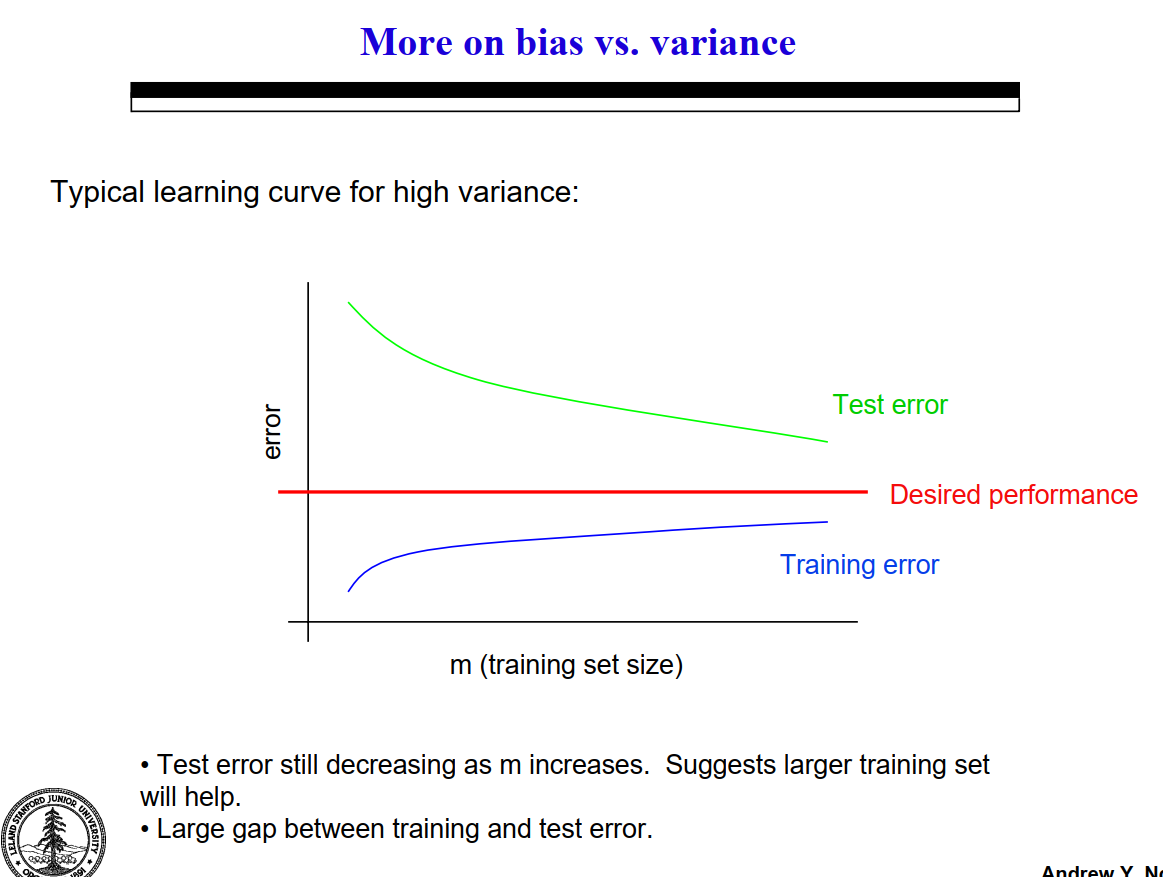

### The *high bias* case: underfitting, where we need models with higher capacity.

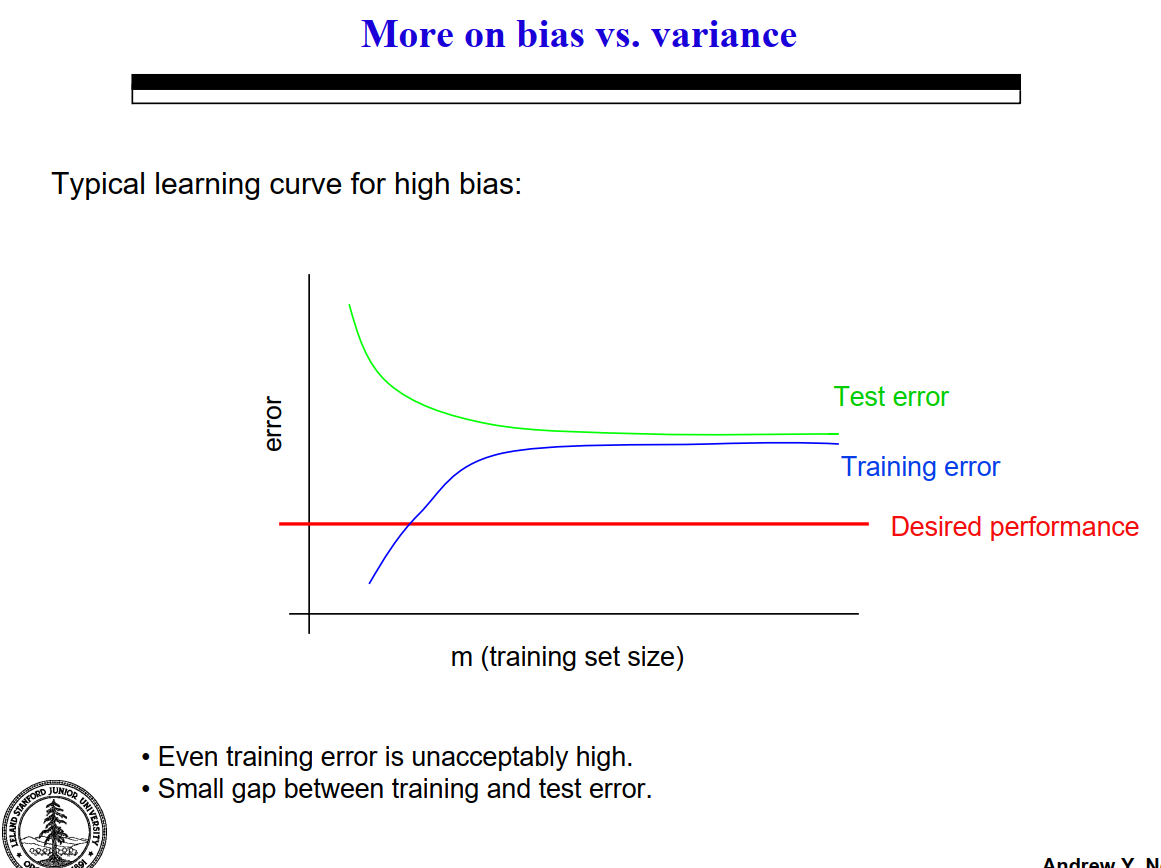

In terms of implementation, `sklearn` has a nice `learning_curve` function. But it plots **score** rather than **error**.

In [12]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

X, y = load_iris(return_X_y=True)
estimator = Ridge()

train_sizes_abs, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=np.array([0.1, 0.33, 0.55, 0.78, 1. ]), cv=5, exploit_incremental_learning=False)

## Why sometimes we want the optimization to converge to the optimum, while other times we perform early stopping

As a rule of thumb, when the ML algorithm underfits, it helps (or does not hurt) to check if the optimization has converged. On the other hand, if it tends to overfit, early stopping will help avoid getting into narrow optimum.

Early stopping is the tricks that are favored in ML algorithms that uses SGD, such as [deep learning](deep_learning_debugging_and_visualization.ipynb). The way is to stop at an epoch where the validation error has seen the minimum for a while, as exemplified by the following:

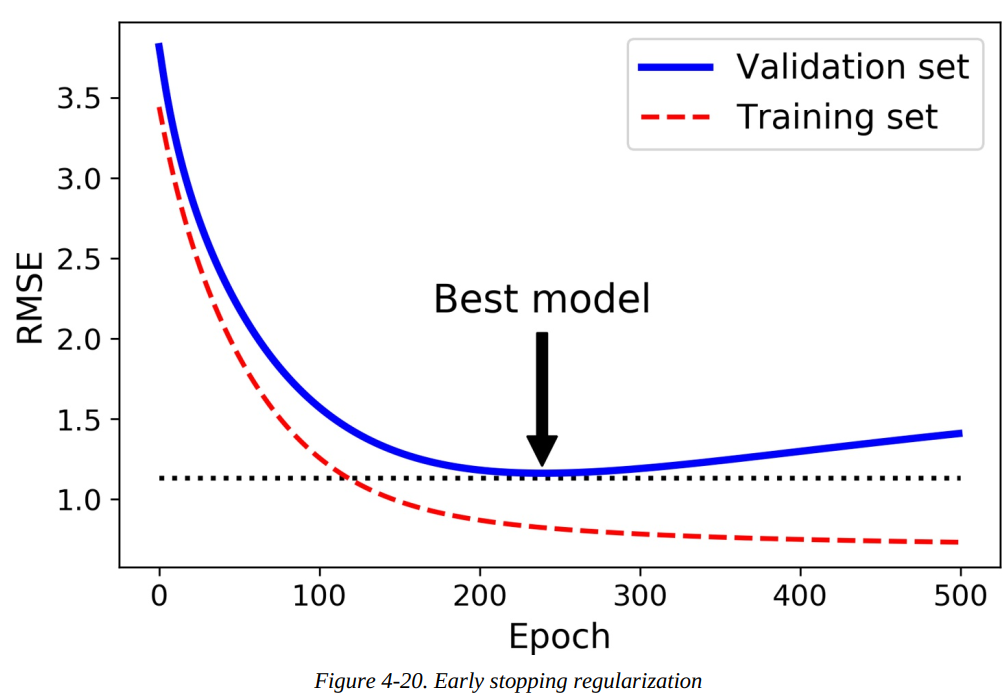

Note that in the graph above, the x axis is the epoch, not to confused by the learning curves above where the x axis is the size of the training data set.

## What other visualization can be useful to improve ML algorithms?

Another model agnostic technique is to plot the scatter plot of the ground truth and model predicted value, in-sample and out-of-sample. But looking at instances that are far away from the $y=x$ line, i.e. model is not doing a good job predicting the ground truth, one can get the intuition what section of $X$ does model do poorly, and potentially can inform which component 'breaks', enhance domain knowledge or finding bugs.

Even if a learning algorithm is working well, you might also run diagnostics to make sure you understand what’s going on. Rather than saying 'Here’s an algorithm that works,' it’s more interesting to say 'Here’s an algorithm that works because of component X, and here’s my justification.'

## What are some famous model agnostic feature importance measures?

### Partial Dependence Plot

The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model. A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic or more complex, somewhat controling for the effects of other features (more on this below).

The partial dependence function for regression is defined as:
\begin{align}
\hat{f}_{x_S}(x_S)=E_{x_C}[\hat{f}(x_S, x_C)]=\int\hat{f}(x_S, x_C)dP(x_C).
\end{align}
The $x_S$ are the features for which the partial dependence function should be plotted and $x_C$ are the other features used in the machine learning model $\hat{f}$. Usually, there are only one or two features in the set $S$, since it is only intuitive for human eyes to visualize one- or two-dimensions. The feature(s) in $S$ are those for which we want to know the effect on the prediction. The feature vectors $x_S$ and $x_C$ combined make up the total feature space $x$. 

In practice, the above is approximated by the sample mean over the training data:
\begin{align}
\hat{f}_{x_S}(x_S) = \frac{1}{N}\sum_{n=1}^N\hat{f}(x_S, x_C^{(n)})
\end{align}

Partial dependence works by marginalizing the machine learning model output over the distribution of the features in set $C$, so that the function shows the relationship between the features in set $S$ we are interested in and the predicted outcome. By marginalizing over the other features, we get a function that depends only on features in $S$, interactions with other features included. The partial function tells us for given value(s) of features S what the average marginal effect on the prediction is. $x_C^{(n)}$ in the sample mean are actual feature values from the dataset for the features in which we are not interested, and n is the number of instances in the dataset. 

#### Advantages

- The computation of partial dependence plots is **intuitive**: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value. In my experience, lay people usually understand the idea of PDPs quickly.

- If the feature for which you computed the PDP is **not correlated** with the other features, then the PDPs perfectly represent how the feature influences the prediction on average. In the uncorrelated case, the interpretation is clear: The partial dependence plot shows how the average prediction in your dataset changes when the $j$-th feature is changed. It is more complicated when features are correlated, see also disadvantages.

- Partial dependence plots are **easy to implement*8.

- The calculation for the partial dependence plots has a **causal interpretation**. We intervene on a feature and measure the changes in the predictions. In doing so, we analyze the causal relationship between the feature and the prediction.28 The relationship is causal for the model – because we explicitly model the outcome as a function of the features – but not necessarily for the real world!

#### Disavantages

- The realistic maximum number of features in a partial dependence function is two. This is not the fault of PDPs, but of the 2-dimensional representation (paper or screen) and also of our inability to imagine more than 3 dimensions.

- Some PD plots do not show the **feature distribution**. Omitting the distribution can be misleading, because you might overinterpret regions with almost no data. This problem is easily solved by showing a rug (indicators for data points on the x-axis) or a histogram.

- The assumption of **independence** is the biggest issue with PD plots. It is assumed that the feature(s) for which the partial dependence is computed are not correlated with other features. For example, suppose you want to predict how fast a person walks, given the person’s weight and height. For the partial dependence of one of the features, e.g. height, we assume that the other features (weight) are not correlated with height, which is obviously a false assumption. For the computation of the PDP at a certain height (e.g. 200 cm), we average over the marginal distribution of weight, which might include a weight below 50 kg, which is unrealistic for a 2 meter person. In other words: When the features are correlated, we create new data points in areas of the feature distribution where the actual probability is very low (for example it is unlikely that someone is 2 meters tall but weighs less than 50 kg). One solution to this problem is to average over the conditional distribution $P(x_C|x_S)$, not $P(x_C)$. But then extra estimation technique on $P(x_C|x_S)$ is required.

- **Heterogeneous effects** might be hidden because PD plots only show the average marginal effects. Suppose that for a feature half your data points have a positive association with the prediction – the larger the feature value the larger the prediction – and the other half has a negative association – the smaller the feature value the larger the prediction. The PD curve could be a horizontal line, since the effects of both halves of the dataset could cancel each other out. You then conclude that the feature has no effect on the prediction. By plotting the individual conditional expectation curves instead of the aggregated line, we can uncover heterogeneous effects.

In [1]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import plot_partial_dependence

X, y = make_hastie_10_2(random_state=0)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X, y)
features = [0, 1, (0, 1)]
plot_partial_dependence(clf, X, features) 

### Permutation Feature Importance

Permutation feature importance measures the increase in the prediction error, or decrease of prediction score of the model (`sklearn` does the latter) after we permuted the feature’s values, which breaks the relationship between the feature and the true outcome.

We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature. 
- A feature is 'important' if shuffling its values increases the model error, because in this case the model relied on the feature for the prediction. 
- A feature is 'unimportant' if shuffling its values leaves the model error unchanged, because in this case the model ignored the feature for the prediction.

Instead of full permutation, one can also split the dataset in half and swap the values of the feature - the two are equivalent.

#### Advantages

- **Nice interpretation**: Feature importance is the increase in model error when the feature’s information is destroyed.

- Feature importance provides a **highly compressed**, **global insight** into the model’s behavior.

- A positive aspect of using the error ratio instead of the error difference is that the feature importance measurements are **comparable across different problems**.

- The importance measure automatically **takes into account all interactions** with other features. By permuting the feature you also destroy the interaction effects with other features. This means that the permutation feature importance takes into account both the main feature effect and the interaction effects on model performance. This is also a disadvantage because the importance of the interaction between two features is included in the importance measurements of both features. This means that the feature importances do not add up to the total drop in performance, but the sum is larger. Only if there is no interaction between the features, as in a linear model, the importances add up approximately.

- Permutation feature importance **does not require retraining the model**. Some other methods suggest deleting a feature, retraining the model and then comparing the model error. Since the retraining of a machine learning model can take a long time, 'only' permuting a feature can save a lot of time. Importance methods that retrain the model with a subset of features appear intuitive at first glance, but the model with the reduced data is meaningless for the feature importance. We are interested in the feature importance of a fixed model. Retraining with a reduced dataset creates a different model than the one we are interested in. Suppose you train a sparse linear model (with Lasso) with a fixed number of features with a non-zero weight. The dataset has 100 features, you set the number of non-zero weights to 5. You analyze the importance of one of the features that have a non-zero weight. You remove the feature and retrain the model. The model performance remains the same because another equally good feature gets a non-zero weight and your conclusion would be that the feature was not important. Another example: The model is a decision tree and we analyze the importance of the feature that was chosen as the first split. You remove the feature and retrain the model. Since another feature is chosen as the first split, the whole tree can be very different, which means that we compare the error rates of (potentially) completely different trees to decide how important that feature is for one of the trees.

#### Disadvantages

- It is very **unclear whether you should use training or test data** to compute the feature importance.

- Permutation feature importance is **linked to the error of the model**. This is not inherently bad, but in some cases not what you need. In some cases, you might prefer to know how much the model’s output varies for a feature without considering what it means for performance. For example, you want to find out how robust your model’s output is when someone manipulates the features. In this case, you would not be interested in how much the model performance decreases when a feature is permuted, but how much of the model’s output variance is explained by each feature. Model variance (explained by the features) and feature importance correlate strongly when the model generalizes well (i.e. it does not overfit).

- You **need access to the true outcome**. If someone only provides you with the model and unlabeled data – but not the true outcome – you cannot compute the permutation feature importance.

- The permutation feature importance depends on shuffling the feature, which adds randomness to the measurement. When the permutation is repeated, the **results might vary greatly**. Repeating the permutation and averaging the importance measures over repetitions stabilizes the measure, but increases the time of computation.

- If features are correlated, the permutation feature importance **can be biased by unrealistic data instances**. The problem is the same as with partial dependence plots: The permutation of features produces unlikely data instances when two or more features are correlated. When they are positively correlated (like height and weight of a person) and I shuffle one of the features, I create new instances that are unlikely or even physically impossible (2 meter person weighing 30 kg for example), yet I use these new instances to measure the importance. In other words, for the permutation feature importance of a correlated feature, we consider how much the model performance decreases when we exchange the feature with values we would never observe in reality. Check if the features are strongly correlated and be careful about the interpretation of the feature importance if they are.

- Another tricky thing: **Adding a correlated feature can decrease the importance of the associated feature** by splitting the importance between both features. When two features are correlated and one of the features is permuted, the model will still have access to the feature through its correlated feature. This will result in a lower importance value for both features, where they might actually be important. One way to handle this is to cluster features that are correlated and only keep one feature from each cluster.

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{diabetes.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

### Surrogate Models

The idea of surrogate models is to train a more interpretable model to approximate the black-box machine learning model, either globally or locally. Conceptually, it can certainly help diagnose what works when the black-box works, and what feature(s) breaks it when it does not. But when the approxmiation is good, one would wonder why we cannot simply use the surrogate model in place of the black-box model; when the approximation is bad, one would question the usefulness for the surrogate model for interpretation purposes.

## References
- < Hands-on Machine Learning >, Chapter 1, 4
- Andrew Ng's slides: [Advice for Applying Machine Learning](http://cs229.stanford.edu/materials/ML-advice.pdf)
- < Interpretable Machine Learning >, [Chapter 5](https://christophm.github.io/interpretable-ml-book/agnostic.html)